<h1>Fashion-MNIST Project </h1>


<h2>Table of Contents</h2>


<p>In this project, we will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Create a Dataset Class</a></li>
<li><a href="#Q2">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 
dataset: https://github.com/zalandoresearch/fashion-mnist

</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<a name="Preparation"><h2 id="Preparation" >Preparation</h2></a>


Download the datasets you needed for this lab.


The following are the PyTorch modules we need for this project


In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 2.9 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 3.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 180.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 30.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 15.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━

In [2]:
### PyTorch Modules needed for this lab
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules 


In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [5]:
# Loading Fashion MNIST


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import namedtuple
import time

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

<hr>


In [6]:

# Use dataloaders for train and test (batch size is 4)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

In [7]:

# The images are of 1, 28, 28 size (only one black-white channel)

trainset[0][0].shape

torch.Size([1, 28, 28])

<hr>


<a name="Q1"><h2 id="Q1"> Create a Dataset Class</h2></a>


In this section, we will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function to perform the following transforms:. 
<ol>
    <li>Use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>Use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

We will then take a screen shot of your validation data.


Use the Compose function to compose the transforms


In [8]:
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

<hr>


Now we will create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. 


In [9]:
# Create dataset objects
dataset_train = dsets.FashionMNIST(root='./fashion/data', train=True, transform=composed, download=True)
dataset_val = dsets.FashionMNIST(root='./fashion/data', train=False, transform=composed, download=True)

# Function to display an image
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().squeeze(), cmap='gray')
    plt.title('Label: ' + str(data_sample[1]))
    plt.show()

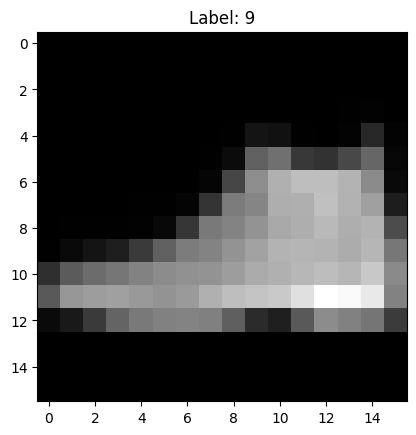

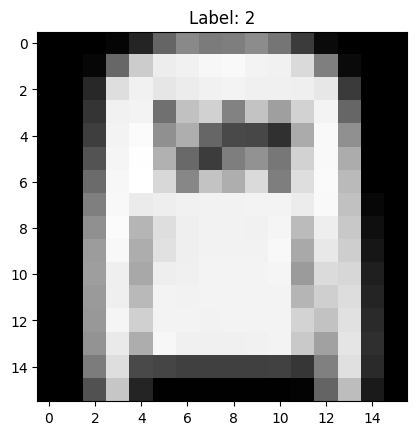

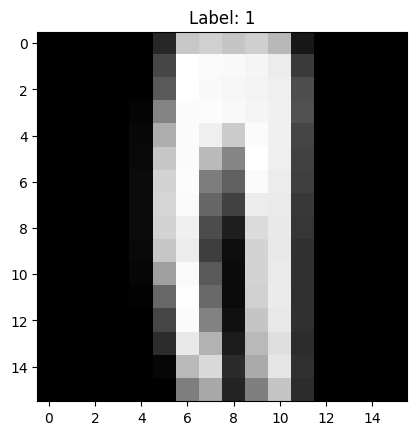

In [11]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

<a name="Q2"><h2 id="Q2"></h2></a>
Now we will Create a Convolutional Neural Network class using one of the following constructors.


Constructor  using Batch Norm 


In [12]:
class CNN_batch(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network


In [13]:
class CNN(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 


In [14]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object 


In [15]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

Now we will create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. We will make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss


In [16]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Code used to train the model 


In [17]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

Next we will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 


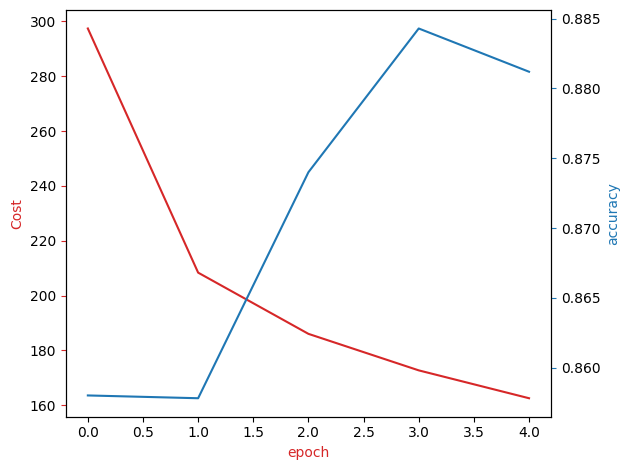

In [18]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

## Conclusion
The model is effectively learning from the Fashion MNIST dataset, improving accuracy while reducing cost. Since the validation accuracy surpasses the 85% threshold, this model meets the project requirement. However, further fine-tuning (such as dropout or data augmentation) could be considered if overfitting occurs in extended training.

<hr>
